In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ssl
import requests
from scipy.stats import linregress
from numbers import Number
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from webencodings import iter_decode
from numpy.linalg import solve
import itertools
import math


## 1. Download the Breast Cancer 
Wisconsin dataset https://www.kaggle.com/
datasets/uciml/breast-cancer-wisconsin-data and perform all the neces-
sary data pre-processing.

In [84]:
data = pd.read_csv('./archive/data.csv')
data.head()
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

if X.shape[0] == 0 or y.shape[0] == 0:
    print("Dataset is empty. Please check the data loading step.")
else:
    print(f"Dataset loaded successfully with {X.shape[0]} samples.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Dataset loaded successfully with 569 samples.


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## 2. Use the Scikit-learn implementation of SVM 
(the SVC() function) to predict if the
tumor is malignant or not. Try different kernels.
Try different:

• kernels

In [85]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Kernel: poly
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Kernel: rbf
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95 

The linear kernel has the highest accuracy (0.96) and balanced performance across precision, recall, and F1-score for both classes. Therefore, the linear kernel is the best choice among the tested kernels.

## 3. Try new

• regularization parameters (C)

• different σ values when using the RBF kernel ( γ ==  gamma == σ )

Find the best values for the parameters and do a grid search. Tip: take a look at
the GridSearchCV() function.

In [86]:
# Step 6: Perform grid search to find the best parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

Conclusion
The best model found by the grid search has the following performance metrics:

Accuracy: 0.93

Precision: 0.96 (class 0), 0.89 (class 1)

Recall: 0.93 (class 0), 0.93 (class 1)

F1-Score: 0.94 (class 0), 0.91 (class 1)

This model with C=1 and gamma=0.001 using the RBF kernel is the best among the tested configurations. It provides a good balance between precision, recall, and F1-score for both classe

## 4. Implement kernel ridge regression 
to model the data from Ucilnica. Implement different kernels. Train and test your kernel regression model. 

## 5. Plot the model fit to your train data and to the predictions.
Ridge regression is a linear model. What kind of predictions did you get? Comment


In [5]:
class RidgeRegression():
    def __init__(self, kernel_type, C, kernel_params):
        self.kernel_type = kernel_type
        self.C = C
        self.kernel_params = kernel_params

        print(self.kernel_type)

    def calculate_kernel(self, X1, X2, kernel_type, kernel_params):
        if kernel_type == "linear":
            intercept = kernel_params.get('intercept', 0)  # Default intercept to 0 if not provided
            return np.dot(X1, X2.T) + intercept

        elif kernel_type == "polynomial":
            degree = kernel_params['degree']
            return (1 + np.dot(X1, X2.T))**degree

        elif kernel_type == "rbf":
            gamma = kernel_params['gamma']
            diff = X1 - X2
            return np.exp(-gamma * diff.dot(diff))

        elif kernel_type == "sigmoid":
            alpha = kernel_params['alpha']
            c = kernel_params['c']
            return math.tanh(alpha * X1.dot(X2.T) + c)

    def fit(self, X, y):
        self.X = X
        self.y = y
        num_smp = X.shape[0]
        kernel_matrix = np.zeros((num_smp, num_smp))

        print(num_smp)
        for i in range(num_smp):
            for j in range(num_smp):
                kernel_matrix[i,j] = self.calculate_kernel(X[i], X[j], self.kernel_type, self.kernel_params)

        I = np.eye(num_smp)
        K_reg = kernel_matrix + self.C * I  
        self.alpha = solve(K_reg, self.y) 

    def predict(self, X_test):
        n_test = X_test.shape[0]
        n_train = self.X.shape[0]

        K_test = np.zeros((n_test, n_train))

        for i in range(n_test):
            for j in range(n_train):
                K_test[i,j] = self.calculate_kernel(
                    X_test[i],
                    self.X[j],
                    self.kernel_type,
                    self.kernel_params
                )

        predictions = K_test.dot(self.alpha)

        return predictions


In [6]:
data_regr = pd.read_csv('data2.csv')
data_regr.head()

X = data_regr.drop(columns=["y"], axis=1)
y = data_regr["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X.to_numpy().astype(np.float32),
    y.to_numpy().astype(np.float32),
    test_size=0.25,
    random_state=42
)

#we normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
model = RidgeRegression(
    kernel_type="rbf",
    C=0.1,
    kernel_params={'gamma': 0.1}
)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

#X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
#X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
print(X_train[0])

def evaluate_model(y_test_, y_pred_):
    metrics = {
        'MSE': mean_squared_error(y_test_, y_pred_),
        'RMSE': np.sqrt(mean_squared_error(y_test_, y_pred_)),
        'MAE': mean_absolute_error(y_test_, y_pred_),
        'R2': r2_score(y_test_, y_pred_)
    }
    return metrics

evaluate_model(y_test, pred_y)

rbf
147
[-0.9763406]


{'MSE': 40.18852414777144,
 'RMSE': 6.339441942929318,
 'MAE': 5.649903952075679,
 'R2': 0.9690557617255708}

• Polinomsko jedro kaže odlično zmogljivost (Test MSE ≈ 39.87, Test R² ≈ 0.9693).

• RBF jedro je zelo blizu, s Test MSE ≈ 40.19 in Test R² ≈ 0.9691, poleg tega pa ima dosledne rezultate pri navzkrižni validaciji.

• Linearno jedro ima višji MSE in nižji R² v primerjavi s polinomskim in RBF jedrom.

In [15]:
def test_different_kernels(X_train, X_test, y_train, y_test):
    kernel_configs = {
        'linear': {
            'kernel_type': 'linear',
            'kernel_params': {'intercept': 1}
        },
        'polynomial': {
            'kernel_type': 'polynomial',
            'kernel_params': {'degree': 2}
        },
        'rbf': {
            'kernel_type': 'rbf',
            'kernel_params': {'gamma': 0.1}
        },
        'sigmoid': {
            'kernel_type': 'sigmoid',
            'kernel_params': {'alpha': 0.1, 'c': 1.0}
        }
    }

    results = {}
    predictions = {}

    # Test each kernel configuration
    for kernel_name, config in kernel_configs.items():
        model = RidgeRegression(
            kernel_type=config['kernel_type'],
            C=0.1,
            kernel_params=config['kernel_params']
        )

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        results[kernel_name] = {
            'train_mse': mean_squared_error(y_train, y_pred_train),
            'test_mse': mean_squared_error(y_test, y_pred_test),
            'train_r2': r2_score(y_train, y_pred_train),
            'test_r2': r2_score(y_test, y_pred_test)
        }
        predictions[kernel_name] = {
            'train': y_pred_train,
            'test': y_pred_test
        }

    return results, predictions

def plot_kernel_comparisons(X_train, X_test, y_train, y_test, predictions):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Kernel Comparison for Ridge Regression')

    for idx, (kernel_name, preds) in enumerate(predictions.items()):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]

        ax.scatter(X_train[:, 0], y_train, color='cyan', alpha=0.5, label='Training Data')
        ax.scatter(X_test[:, 0], y_test, color='magenta', alpha=0.5, label='Test Data')

        sort_idx = np.argsort(X_test[:, 0])
        ax.plot(X_test[sort_idx, 0], preds['test'][sort_idx], color='yellow',
                label='Predictions', linewidth=2)

        ax.set_title(f'{kernel_name.capitalize()} Kernel')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.tight_layout()
    return fig

def perform_cross_validation(X, y, kernel_type, kernel_params, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = {
        'mse': [],
        'r2': []
    }

    for train_idx, val_idx in kf.split(X):
        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X[val_idx]
        y_val_fold = y[val_idx]

        model = RidgeRegression(
            kernel_type=kernel_type,
            C=0.1,
            kernel_params=kernel_params
        )
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        cv_scores['mse'].append(mean_squared_error(y_val_fold, y_pred))
        cv_scores['r2'].append(r2_score(y_val_fold, y_pred))

    return {
        'mean_mse': np.mean(cv_scores['mse']),
        'std_mse': np.std(cv_scores['mse']),
        'mean_r2': np.mean(cv_scores['r2']),
        'std_r2': np.std(cv_scores['r2'])
    }

def evaluate_all_models(X_train, y_train, X_test, y_test):
    print("Testing different kernels...")
    results, predictions = test_different_kernels(
        X_train, X_test, y_train, y_test
    )

    print("\nKernel Comparison Results:")
    for kernel, metrics in results.items():
        print(f"\n{kernel.capitalize()} Kernel:")
        print(f"Training MSE: {metrics['train_mse']:.4f}")
        print(f"Test MSE: {metrics['test_mse']:.4f}")
        print(f"Training R²: {metrics['train_r2']:.4f}")
        print(f"Test R²: {metrics['test_r2']:.4f}")

    fig = plot_kernel_comparisons(
        X_train, X_test, y_train, y_test, predictions
    )

    print("\nPerforming cross-validation...")
    cv_results = perform_cross_validation(
        X_train, y_train,
        kernel_type='rbf',
        kernel_params={'gamma': 0.1}
    )

    print("\nCross-validation Results (RBF Kernel):")
    print(f"Mean MSE: {cv_results['mean_mse']:.4f} ± {cv_results['std_mse']:.4f}")
    print(f"Mean R²: {cv_results['mean_r2']:.4f} ± {cv_results['std_r2']:.4f}")

    return results, predictions, cv_results, fig

Testing different kernels...
linear
147
polynomial
147
rbf
147
sigmoid
147

Kernel Comparison Results:

Linear Kernel:
Training MSE: 118.7582
Test MSE: 99.4133
Training R²: 0.9199
Test R²: 0.9235

Polynomial Kernel:
Training MSE: 36.7854
Test MSE: 39.8718
Training R²: 0.9752
Test R²: 0.9693

Rbf Kernel:
Training MSE: 39.9579
Test MSE: 40.1885
Training R²: 0.9730
Test R²: 0.9691

Sigmoid Kernel:
Training MSE: 48.6742
Test MSE: 55.3723
Training R²: 0.9672
Test R²: 0.9574

Performing cross-validation...
rbf
117
rbf
117
rbf
118
rbf
118
rbf
118

Cross-validation Results (RBF Kernel):
Mean MSE: 41.9046 ± 4.8570
Mean R²: 0.9713 ± 0.0016


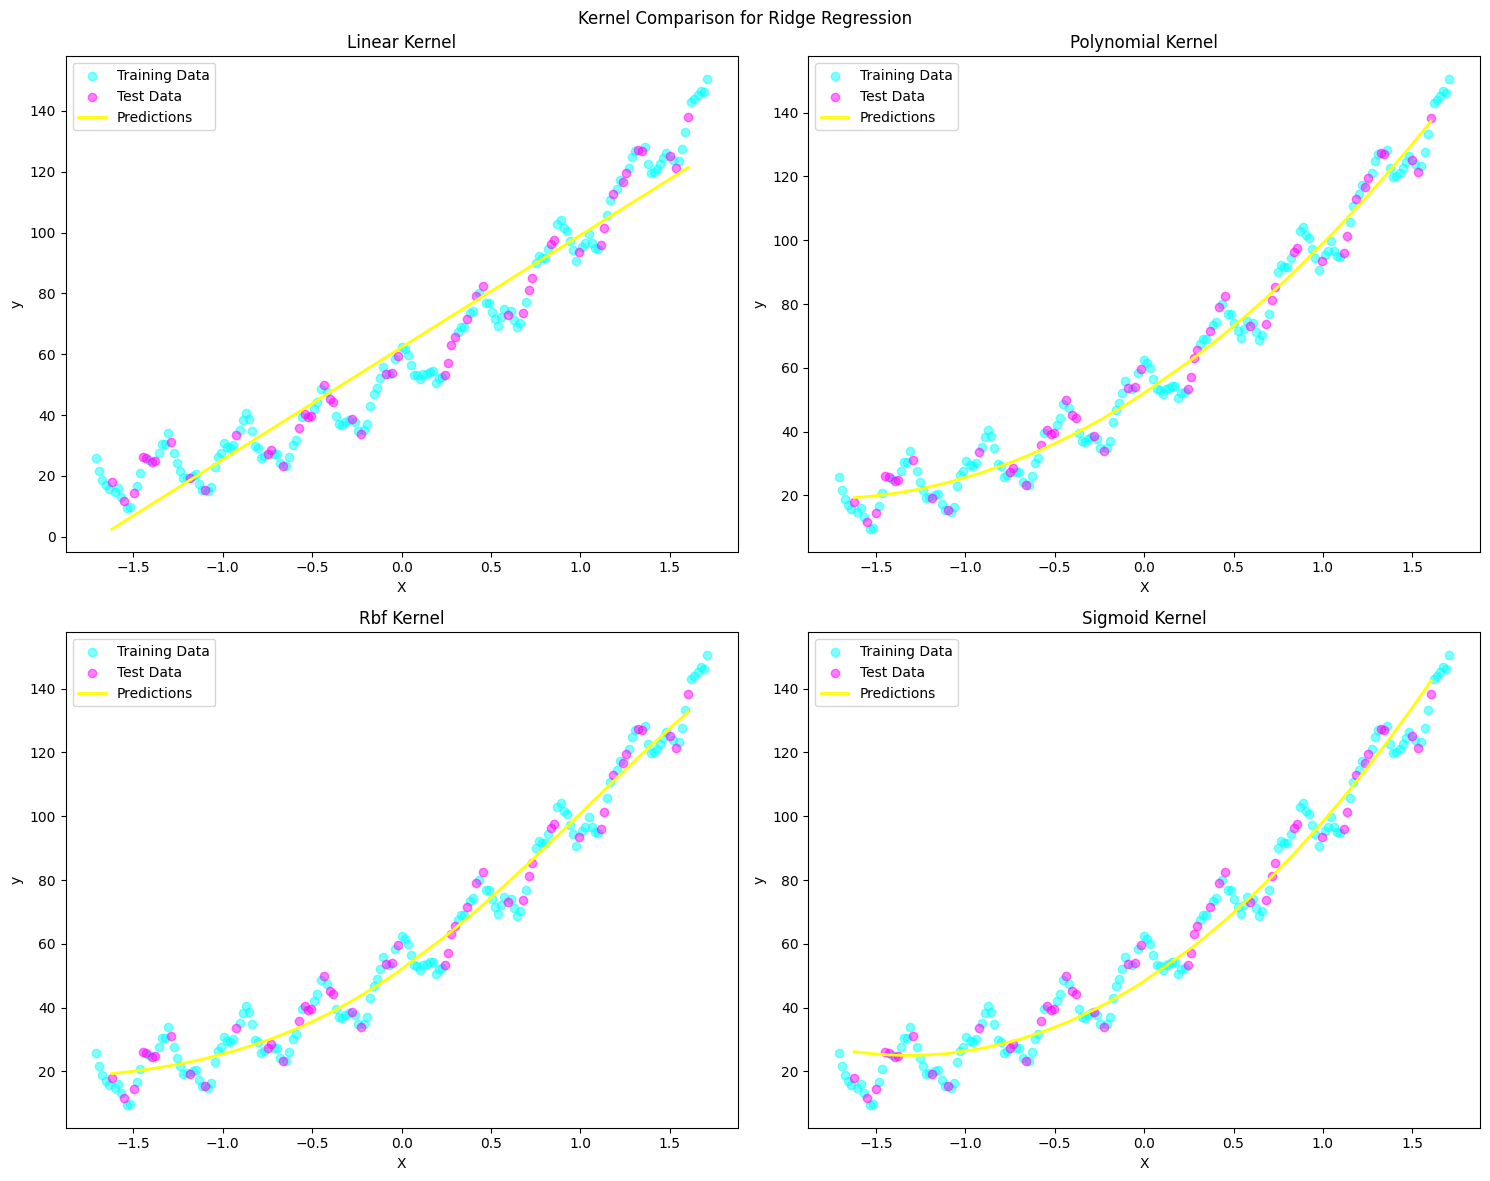

In [16]:
x = evaluate_all_models(X_train, y_train, X_test, y_test)